## Task-3

## Car Price Prediction with Machine learning

#### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. 

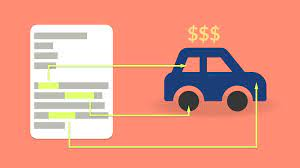

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Reading CSV File

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [3]:
dataset['CarName'], dataset['symboling']=dataset.iloc[:, 1].values, dataset.iloc[:,2].values
col_list = list(dataset)
col_list[1],col_list[2] = col_list[2], col_list[1]
dataset.columns = col_list
dataset

,car_ID,CarName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),-1,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo 144ea,-1,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo 244dl,-1,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo 246,-1,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Describing Dataset

In [4]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
dataset.isnull().sum()

car_ID              0
CarName             0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   symboling         205 non-null    int64  
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Analyzing Price by Distplot

C:\Users\BhavyaSri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


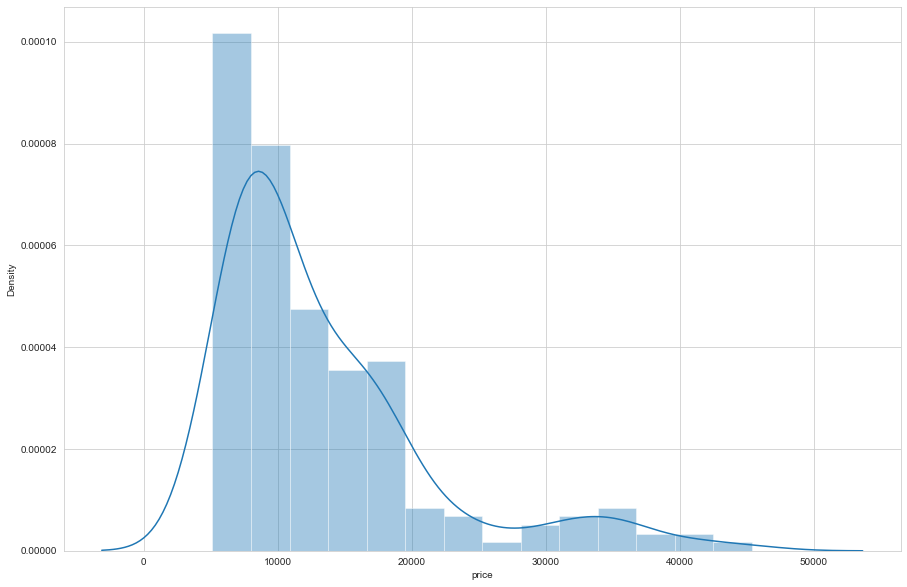

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(dataset.price)
plt.show()

### Encoding dataset

In [8]:
x1 = dataset.fueltype.unique()
mp1 = dict(zip(x1, range(len(x1))))
x2 = dataset.aspiration.unique()
mp2 = dict(zip(x2, range(len(x2))))
x3 = dataset.doornumber.unique()
mp3 = dict(zip(x3, range(len(x3))))
x4 = dataset.carbody.unique()
mp4 = dict(zip(x4, range(len(x4))))
x5 = dataset.drivewheel.unique()
mp5 = dict(zip(x5, range(len(x5))))
x6 = dataset.enginelocation.unique()
mp6 = dict(zip(x6, range(len(x6))))
x7 = dataset.fuelsystem.unique()
mp7 = dict(zip(x7, range(len(x7))))
x8 = dataset.enginetype.unique()
mp8 = dict(zip(x8, range(len(x8))))
x9 = dataset.cylindernumber.unique()
mp9 = dict(zip((x9), range(len(x9))))
dataset = dataset.replace({'fueltype': mp1, 'aspiration':mp2, 'doornumber':mp3, 'carbody':mp4,'drivewheel':mp5,
                           'enginelocation':mp6, 'fuelsystem':mp7, 'enginetype':mp8, 'cylindernumber':mp9})
dataset

,car_ID,CarName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,3,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,3,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,1,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,2,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,2,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),-1,0,0,1,2,0,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo 144ea,-1,0,1,1,2,0,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo 244dl,-1,0,0,1,2,0,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo 246,-1,1,1,1,2,0,0,109.1,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
dataset['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

### Analysing the dataset

#### Getting data from the dataset

In [10]:
cr_name = dataset.CarName.unique()
print("Cars in the dataset are:- ", cr_name)

Cars in the dataset are:-  ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick 

In [11]:
# Generating dictionary of Car-brands and their models names 
Car_companies = {}
for cars in cr_name:
    car = cars.split()
    if car[0] in Car_companies:
        Car_companies[car[0]][0]+= 1
        Car_companies[car[0]].append(cars)
    else:
        Car_companies[car[0]] = [1, cars]


# Getting Car-brands names list 
Company_Names = list(Car_companies.keys())

# No of Model Car-brands have 
No_of_models = []
for no_of_model in Car_companies.values():
    No_of_models.append(no_of_model[0])

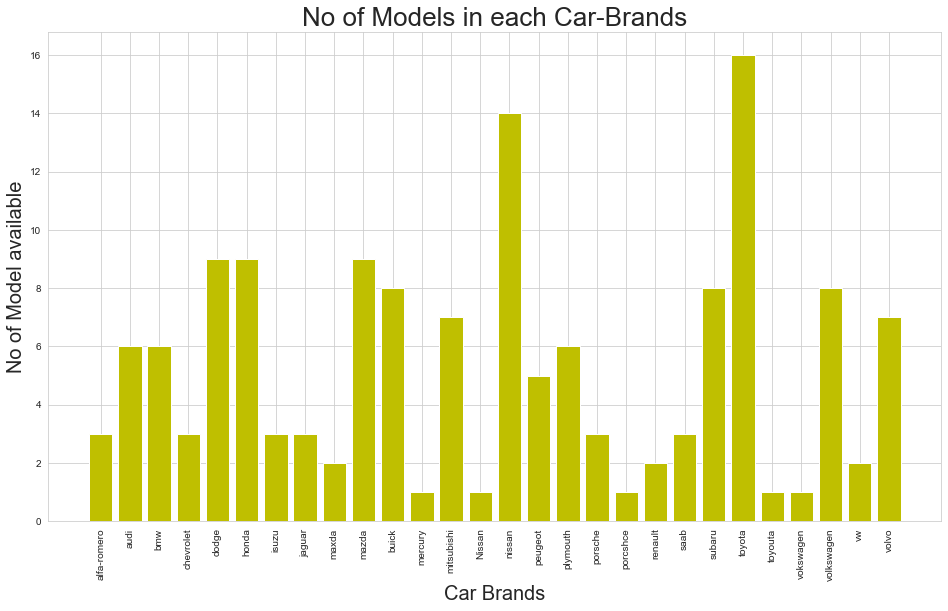

In [12]:
plt.figure(figsize=(16,9))
plt.bar(Company_Names, No_of_models, color='y')
plt.xticks(rotation=90)
plt.xlabel("Car Brands", font={'size':20})
plt.ylabel("No of Model available", font={'size':20})
plt.title("No of Models in each Car-Brands", font={'size':26})
plt.show()

In [13]:
# Getting the Price value of each models saled by Car-brand
model_prices = {}
for company in Car_companies:
    if company not in model_prices:
        model_prices[company] = np.array(0)
    for car in Car_companies[company][1:]:
        c = dataset.loc[dataset["CarName"] == car]
        model_prices[company] = np.append(model_prices[company], c['price'].values[0])
    model_prices[company] = model_prices[company][1:]
# print(model_prices)

In [14]:
# Getting the Mean-Price value of models saled by each Car-brand
mean_price = {}
for company in Car_companies:
    company_mean_price = int(model_prices[company].mean())
    mean_price[company] = company_mean_price

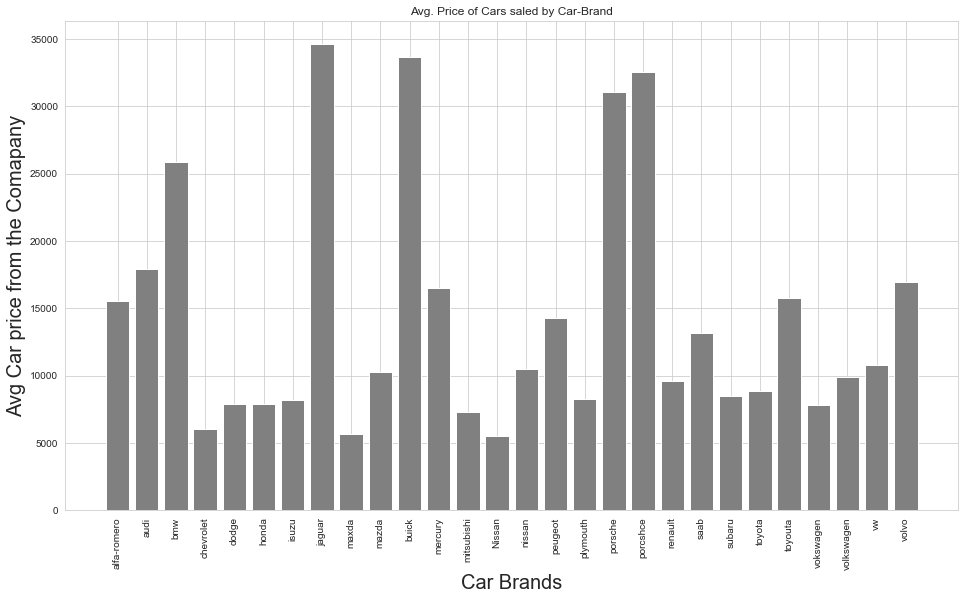

In [15]:
plt.figure(figsize=(16,9))
plt.bar(Company_Names, list(mean_price.values()), color='grey')
plt.xticks(rotation=90)
plt.xlabel("Car Brands", font={'size':20})
plt.ylabel("Avg Car price from the Comapany", font={'size':20})
plt.title("Avg. Price of Cars saled by Car-Brand")
plt.show()

In [16]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values
X

array([[ 3.0e+00,  0.0e+00,  0.0e+00, ...,  5.0e+03,  2.1e+01,  2.7e+01],
       [ 3.0e+00,  0.0e+00,  0.0e+00, ...,  5.0e+03,  2.1e+01,  2.7e+01],
       [ 1.0e+00,  0.0e+00,  0.0e+00, ...,  5.0e+03,  1.9e+01,  2.6e+01],
       ...,
       [-1.0e+00,  0.0e+00,  0.0e+00, ...,  5.5e+03,  1.8e+01,  2.3e+01],
       [-1.0e+00,  1.0e+00,  1.0e+00, ...,  4.8e+03,  2.6e+01,  2.7e+01],
       [-1.0e+00,  0.0e+00,  1.0e+00, ...,  5.4e+03,  1.9e+01,  2.5e+01]])

In [17]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

### Splitting Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
### Training a Car Price Prediction Model 

In [20]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Prediction

In [21]:
y_pred = model.predict(X_test)
y_pred

array([ 6095., 15690., 13950.,  5399.,  9960., 18280.,  5572.,  6918.,
       18399.,  7129., 21105., 36000., 11845., 13200.,  6575., 18280.,
       12170., 17710.,  9095.,  6338.,  9279., 15040., 13950., 18280.,
       16558.,  7053.,  7738., 15040.,  7198.,  6649.,  8195., 13845.,
       18399.,  9370.,  7299., 30760.,  9298., 18620.,  6229., 36000.,
        6575.])

### Accuracy

In [22]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, y_pred)

1.0

### In this project predict price of car on basis of diffrent factor, the model gives 100% accuracy on the test set, which is excellent.